In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

from src.load_dataset import load_dataset
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [69]:
ML1_X, ML1_y = load_dataset('/Users/sangam/Desktop/Epilepsey/Code/vgramreg/ML1_ML2/2024_02_19_ML1', normalization=False, split=False)
ML2_X, ML2_y = load_dataset('/Users/sangam/Desktop/Epilepsey/Code/vgramreg/ML1_ML2/2024_02_22_ML2', normalization=False, split=False)
ML4_X, ML4_y = load_dataset('/Users/sangam/Desktop/Epilepsey/Code/vgramreg/ML4', normalization=False, split=False)

/Users/sangam/Desktop/Epilepsey/Code/vgramreg/src/load_dataset.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={"PH": 'univariate, max(S)', 'signal_std':'univariate, std(S)', 'signal_mean':'univariate, mean(S)', 'peak area':'univariate, area(S)', \
/Users/sangam/Desktop/Epilepsey/Code/vgramreg/src/load_dataset.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={"PH": 'univariate, max(S)', 'signal_std':'univariate, std(S)', 'signal_mean':'univariate, mean(S)', 'peak area':'univariate, area(S)', \
/Users/sangam/Desktop/Epilepsey/Code/vgramreg/src/load_dataset.py:60: SettingWithCop

In [70]:
conc         = 'all'
data         = pd.concat([ML1_X, ML2_X, ML4_X]) if conc=='all' else pd.concat([ML1_X[ML1_y==conc], ML2_X[ML2_y==conc], ML4_X[ML4_y==conc]])
batch_labels = np.repeat(['ML1', 'ML2', 'ML4'], repeats= [len(ML1_X), len(ML2_X), len(ML4_X)] if conc=='all' else [ML1_y.value_counts()[conc], ML2_y.value_counts()[conc], ML4_y.value_counts()[conc]])
labels       = ML1_y.values.tolist() + ML2_y.values.tolist() + ML4_y.values.tolist()

In [71]:
def tsen_pca_viz(data, batch_labels, labels, filename=''):
    tsne        = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(data)
    
    # Convert t-SNE result to a DataFrame for easier plotting
    tsne_df          = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
    tsne_df['Batch'] = batch_labels
    tsne_df['labels'] = labels

    os.makedirs('batch_effect', exist_ok=True)
    
    # Plot t-SNE

    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Batch', style='labels', data=tsne_df, palette='deep', markers=['o', 's', '^'], s=20, ax=axs[0])
    axs[0].set_title('t-SNE: Batch Effect Visualization')

    
    # Perform PCA
    pca        = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    
    # Convert PCA result to a DataFrame for easier plotting
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df['Batch']  = batch_labels
    pca_df['labels'] = labels
    
    # Plot PCA
    sns.scatterplot(x='PC1', y='PC2', hue='Batch', style='labels', data=pca_df, palette='deep', markers=['o', 's', '^'], s=20, ax=axs[1])
    axs[1].set_title('PCA: Batch Effect Visualization')
    
    plt.savefig(f'batch_effect/{filename}.png', dpi=300)

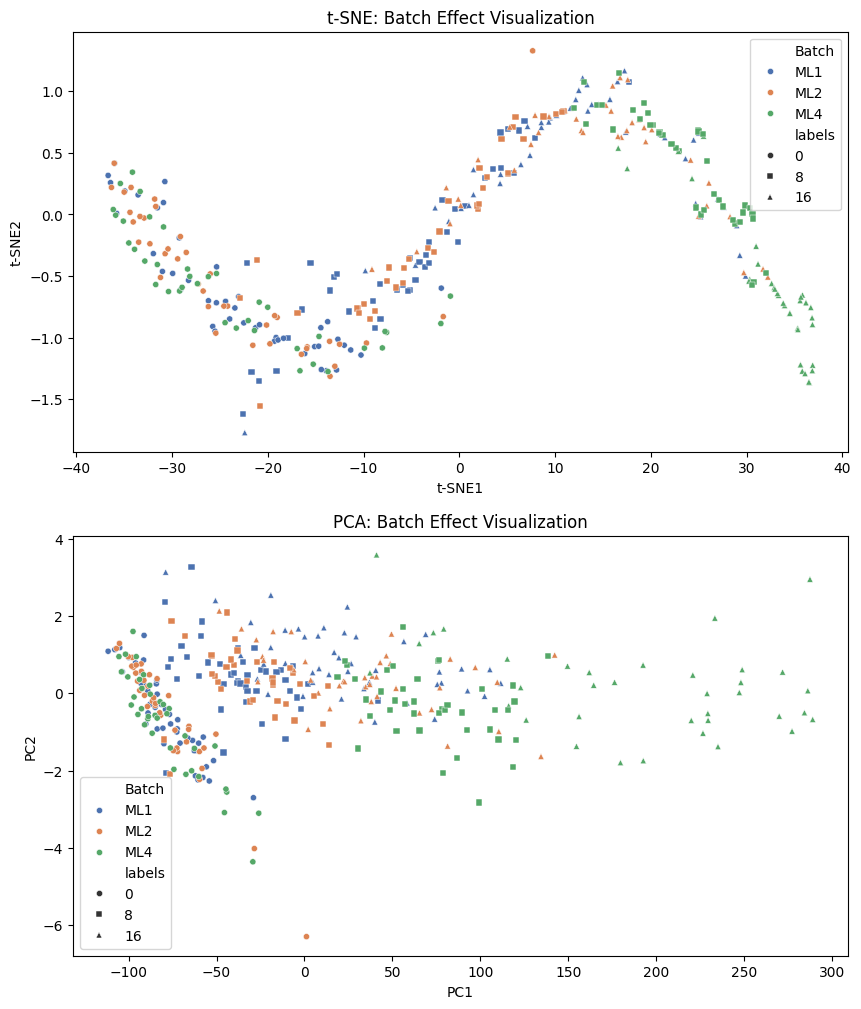

In [72]:
experiment_name = 'batch_effect_raw'
tsen_pca_viz(data, batch_labels, labels, filename=experiment_name)

# Perform ComBat Normalization

In [73]:
from pycombat import Combat

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [76]:
# Load normalized dataset
normalization    = True
standardize_type = 'min_max'

ML1_X, ML1_y  = load_dataset('/Users/sangam/Desktop/Epilepsey/Code/vgramreg/ML1_ML2/2024_02_19_ML1', normalization=normalization, standardize_type=standardize_type, split=False)
ML2_X, ML2_y  = load_dataset('/Users/sangam/Desktop/Epilepsey/Code/vgramreg/ML1_ML2/2024_02_22_ML2', normalization=normalization, standardize_type=standardize_type, split=False)
ML4_X, ML4_y  = load_dataset('/Users/sangam/Desktop/Epilepsey/Code/vgramreg/ML4', normalization=normalization, standardize_type=standardize_type, split=False)

/Users/sangam/Desktop/Epilepsey/Code/vgramreg/src/load_dataset.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={"PH": 'univariate, max(S)', 'signal_std':'univariate, std(S)', 'signal_mean':'univariate, mean(S)', 'peak area':'univariate, area(S)', \
/Users/sangam/Desktop/Epilepsey/Code/vgramreg/src/load_dataset.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={"PH": 'univariate, max(S)', 'signal_std':'univariate, std(S)', 'signal_mean':'univariate, mean(S)', 'peak area':'univariate, area(S)', \
/Users/sangam/Desktop/Epilepsey/Code/vgramreg/src/load_dataset.py:60: SettingWithCop

In [77]:
conc         = 'all'
data         = pd.concat([ML1_X, ML2_X, ML4_X]) if conc=='all' else pd.concat([ML1_X[ML1_y==conc], ML2_X[ML2_y==conc], ML4_X[ML4_y==conc]])
batch_labels = np.repeat(['ML1', 'ML2', 'ML4'], repeats= [len(ML1_X), len(ML2_X), len(ML4_X)] if conc=='all' else [ML1_y.value_counts()[conc], ML2_y.value_counts()[conc], ML4_y.value_counts()[conc]])
labels       = ML1_y.values.tolist() + ML2_y.values.tolist() + ML4_y.values.tolist()

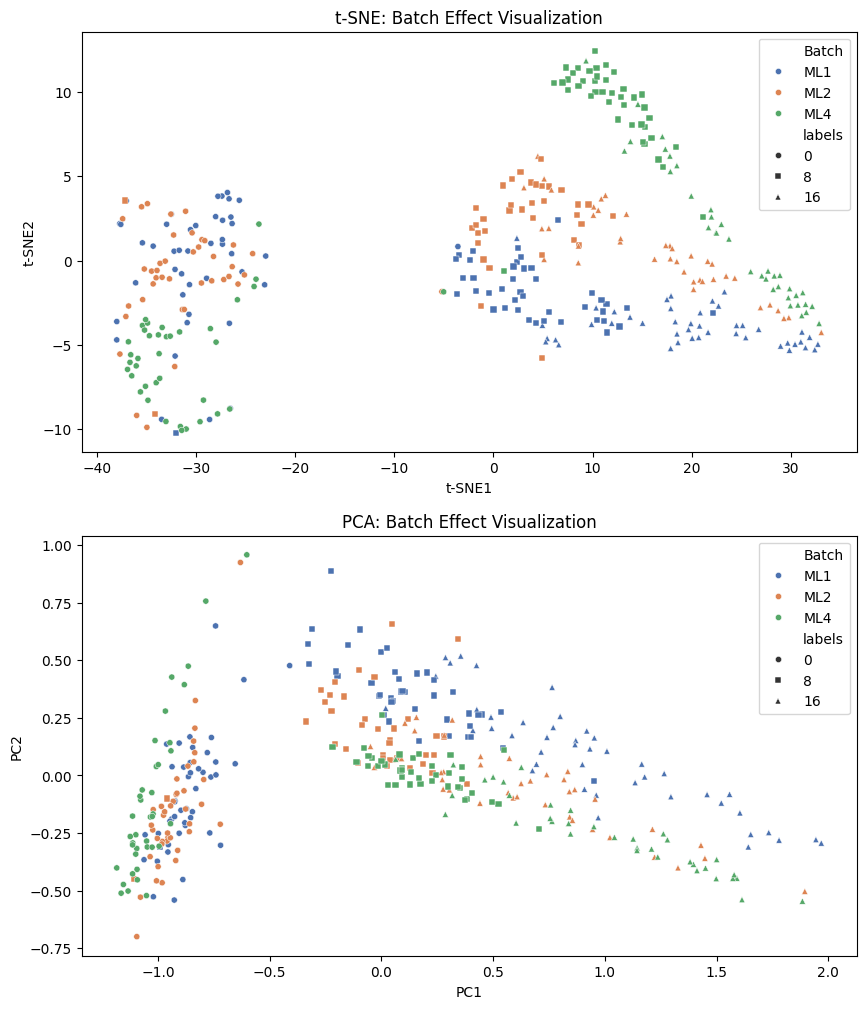

In [78]:
experiment_name = 'batch_effect_MinMaxNorm'
tsen_pca_viz(data, batch_labels, labels, filename=experiment_name)

In [79]:
features = data.values

# Apply ComBat
combat_data = combat.fit_transform(features, batch_labels)
combat_df   = pd.DataFrame(combat_data, columns=data.columns)

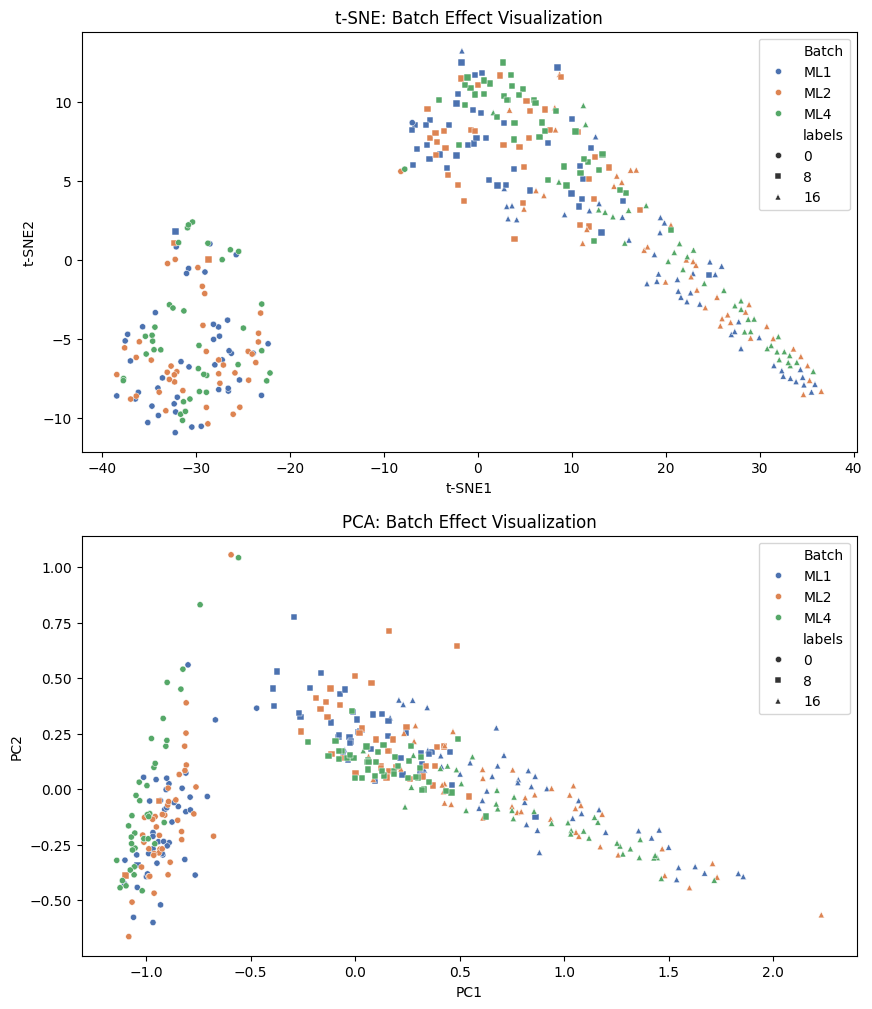

In [80]:
experiment_name = 'batch_effect_ComBat'
tsen_pca_viz(combat_df, batch_labels, labels, filename=experiment_name)